In [2]:
import censusdata
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy import stats

In [3]:
# Specify path to read file
path = os.path.join("Resources", "USCS_OverviewMap.csv")

# Read in pandas
df = pd.read_csv(path)  

In [4]:
states = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2017)

# print(states['California'])

In [5]:
# unemploy = censusdata.search('acs5', 2017, 'label', 'living alone')
# unemploy

In [6]:
# Download ACS 2011-2015 5-year estimates for Oakland city, California on population size, median age, and median household income.
data = censusdata.download('acs5', 2017, censusdata.censusgeo([('state', '*')]), ['B01001_001E', 'B01002_001E', 'B19013_001E','B12006_006E','B12006_011E','B17005_006E', "B17005_011E", "C27016_041E", "B19215_005E", "B19215_008E", "B09019_027E", "B09019_030E"])

data_table = data.rename(columns={"B01001_001E": "population size", "B01002_001E": "median age",
                                  "B19013_001E" : "median household income", "B12006_006E" : "NeverMarried Unemployed Male", 
                                  "B12006_011E" : "NeverMarried Unemployed Female", "B17005_006E" : "Unemployed Male below line", 
                                  "B17005_011E" : "Unemployed Female below line", "C27016_041E" : "4.00 of poverty threshold 65 years and over No health insurance coverage",
                                  "B19215_005E" : "MEDIAN HOUSEHOLD INCOME Living Alone 65 and over", "B19215_008E" : "MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over",
                                  "B09019_027E" : "Male Living alone", "B09019_030E" : "Female Living alone"})
# data_table.head()

In [7]:
data_table.index = data_table.index.astype(str)
data_table["Area"] = data_table.index.str.split(':').str[0]

# data_table.head()

In [8]:
deathrates_census = pd.merge(df, data_table, on="Area")

In [9]:
deathrates_census

,Area,CancerType,Year,Sex,Race,AgeAdjustedRate,DeathCount,Population,population size,median age,median household income,NeverMarried Unemployed Male,NeverMarried Unemployed Female,Unemployed Male below line,Unemployed Female below line,4.00 of poverty threshold 65 years and over No health insurance coverage,MEDIAN HOUSEHOLD INCOME Living Alone 65 and over,MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over,Male Living alone,Female Living alone
0,Nevada,All Types of Cancer,2017,Male and Female,All Races,156.3,5283,2972405,2887725,37.7,55434,34511,23373,19627,17581,2377,27198,54795,153505,145577
1,Idaho,All Types of Cancer,2017,Male and Female,All Races,153.2,3020,1718904,1657375,35.9,50985,13043,8996,7066,5906,230,24477,47566,72612,86543
2,Wyoming,All Types of Cancer,2017,Male and Female,All Races,136.0,948,578934,583200,37.0,60938,4656,2443,2094,1833,74,28109,63704,32734,32514
3,Colorado,All Types of Cancer,2017,Male and Female,All Races,131.1,7829,5615902,5436519,36.5,65458,48543,30309,21924,19648,1314,30413,63683,268365,298983
4,Georgia,All Types of Cancer,2017,Male and Female,All Races,155.4,17135,10413055,10201635,36.4,52977,113761,96225,57643,72843,3374,24971,51097,426811,556204
5,Montana,All Types of Cancer,2017,Male and Female,All Races,152.1,2145,1053090,1029862,39.8,50801,7871,4496,4586,3555,126,24645,59076,62013,65703
6,Texas,All Types of Cancer,2017,Male and Female,All Races,147.3,40668,28322717,27419612,34.3,57051,236953,172816,109949,124794,16359,26145,51062,1100507,1251742
7,New Mexico,All Types of Cancer,2017,Male and Female,All Races,138.2,3620,2093395,2084828,37.3,46718,25416,16614,15033,14125,1000,25465,49917,108694,124437
8,Utah,All Types of Cancer,2017,Male and Female,All Races,121.0,3160,3103118,2993941,30.5,65325,20902,13961,8770,8605,868,29952,57951,84779,95270
9,California,All Types of Cancer,2017,Male and Female,All Races,137.2,59515,39399349,38982847,36.1,67169,479114,337696,222854,218801,17678,30557,64011,1378550,1697133


In [10]:
# deathrates_census.columns = [c.replace(' ', '') for c in deathrates_census.columns]
deathrates_census["Never Married Percentage"] = (deathrates_census["NeverMarried Unemployed Male"] +deathrates_census["NeverMarried Unemployed Female"]) / deathrates_census["population size"]
deathrates_census["Unemployed Below Line"] = (deathrates_census["Unemployed Male below line"] +deathrates_census["Unemployed Female below line"]) / deathrates_census["population size"]
deathrates_census["No Insurance Over 65 Below Line"] = (deathrates_census["4.00 of poverty threshold 65 years and over No health insurance coverage"] ) / deathrates_census["population size"]
deathrates_census["Living Alone Percentage"] = (deathrates_census["Male Living alone"] +deathrates_census["Female Living alone"]) / deathrates_census["population size"]
# deathrates_census.columns

In [11]:
# # Export file for out
# compression_opts = dict(method='zip',
#                         archive_name='out.csv')  
# deathrates_census.to_csv('out.zip', index=False,
#           compression=compression_opts)  

In [12]:
# deathrates_census.head()

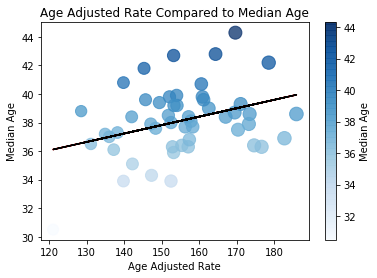

The correlation between age rate and median age is 0.34


In [18]:
# Compare Deaths to median age
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
y_axis = deathrates_census.loc[:,'median age']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
# print(rvalue)

# Create Plot
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Blues', s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

plt.title('Age Adjusted Rate Compared to Median Age')
plt.xlabel('Age Adjusted Rate')
plt.ylabel('Median Age')
plt.plot(x_axis,regress_values,"k-")
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")
cbar = plt.colorbar()
cbar.set_label('Median Age')
plt.show()

print(f"The correlation between age rate and median age is {round(rvalue,2)}")

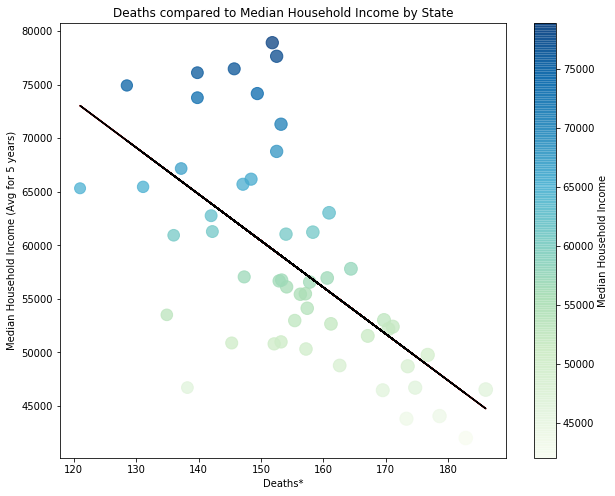

The correlation between age rate and median household income age is -0.63
*Death count was adjusted for differences in age distributions


<Figure size 432x288 with 0 Axes>

In [21]:
# Compare Deaths to median age
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
y_axis = deathrates_census.loc[:,'median household income']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
# print(rvalue)

# Create Plot
plt.figure(figsize=(10,8))
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'GnBu', s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

plt.title('Deaths compared to Median Household Income by State')
plt.xlabel('Deaths*')
plt.ylabel('Median Household Income (Avg for 5 years)')
plt.plot(x_axis,regress_values,"k-")
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")
cbar = plt.colorbar()
cbar.set_label('Median Household Income')
plt.show()

print(f"The correlation between age rate and median household income age is {round(rvalue,2)}")
print(f"*Death count was adjusted for differences in age distributions")
plt.savefig("IncomeByState.png")

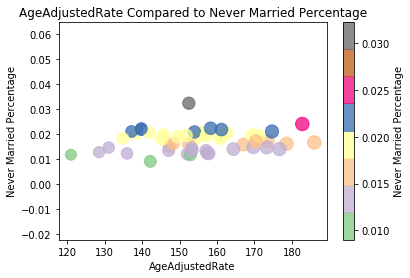

In [14]:
# Compare Deaths to Never Married Percentage
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
y_axis = deathrates_census.loc[:,'Never Married Percentage']
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Accent', s=x_axis, alpha=0.75)
plt.title('AgeAdjustedRate Compared to Never Married Percentage')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('Never Married Percentage')
cbar = plt.colorbar()
cbar.set_label('Never Married Percentage')
plt.show()

In [15]:
# deathrates_census.sort_values(by='Never Married Percentage', ascending=False)

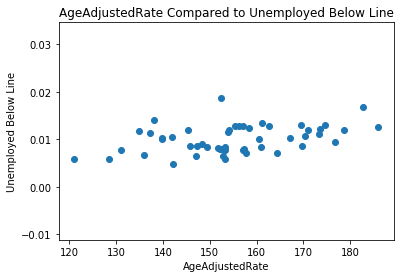

In [16]:
# Compare Deaths to Unemployed Male below line
plt.scatter(deathrates_census.loc[:,"AgeAdjustedRate"],deathrates_census.loc[:,'Unemployed Below Line'])
plt.title('AgeAdjustedRate Compared to Unemployed Below Line')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('Unemployed Below Line')
plt.show()

In [17]:
# deathrates_census.sort_values(by='Unemployed Below Line', ascending=False)

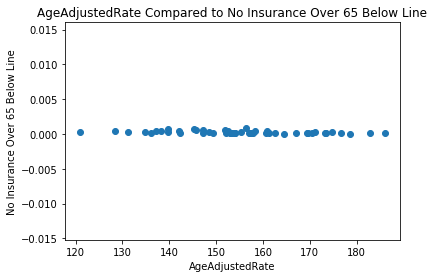

In [18]:
# Compare Deaths to No Insurance Over 65 Below Line
plt.scatter(deathrates_census.loc[:,"AgeAdjustedRate"],deathrates_census.loc[:,'No Insurance Over 65 Below Line'])
plt.title('AgeAdjustedRate Compared to No Insurance Over 65 Below Line')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('No Insurance Over 65 Below Line')
plt.show()

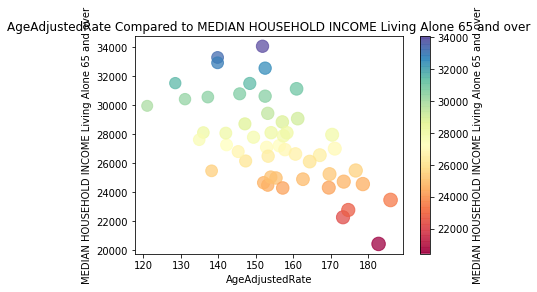

In [19]:

x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
y_axis = deathrates_census.loc[:,'MEDIAN HOUSEHOLD INCOME Living Alone 65 and over']
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Spectral', s=x_axis, alpha=0.75)
plt.title('AgeAdjustedRate Compared to MEDIAN HOUSEHOLD INCOME Living Alone 65 and over')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('MEDIAN HOUSEHOLD INCOME Living Alone 65 and over')
cbar = plt.colorbar()
cbar.set_label('MEDIAN HOUSEHOLD INCOME Living Alone 65 and over')
plt.show()

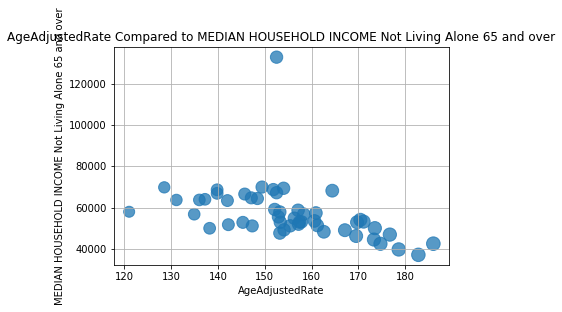

In [20]:
# Compare Deaths to MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
plt.scatter(x_axis, deathrates_census.loc[:,'MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over'], s=x_axis, alpha=0.75)
plt.title('AgeAdjustedRate Compared to MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over')
plt.grid(True)
plt.show()

In [21]:
# deathrates_census.sort_values(by='MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over', ascending=False)

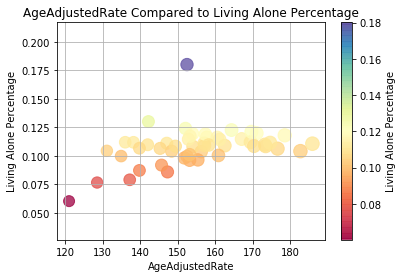

In [22]:
# Compare Deaths to Living Alone Percentage
x_axis = deathrates_census.loc[:,"AgeAdjustedRate"]
y_axis = deathrates_census.loc[:,'Living Alone Percentage']
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Spectral', s=x_axis, alpha=0.75)
plt.title('AgeAdjustedRate Compared to Living Alone Percentage')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('Living Alone Percentage')
plt.grid(True)
cbar = plt.colorbar()
cbar.set_label('Living Alone Percentage')
plt.show()

In [23]:
# deathrates_census.sort_values(by='Living Alone Percentage', ascending=False)